In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Problem 01 (50 points)


1.1 (10 points) Load the dataset `rating_final.csv` into a Pandas data frame, drop the column `userID`, then compute the `mean` and `standard deviation` of  `rating`, `food_rating`, and `service_rating` after grouping the data by `placeID`. Print first five rows of the result using the `head()` method. 

In [2]:
# load rating_final.csv and drop userID column
ratings = pd.read_csv('rating_final.csv').drop(columns = ['userID'])

# compute mean and std and print first 5 rows
ratings.groupby('placeID').agg(['mean', 'std']).head()

rating           food_rating           service_rating          
          mean       std        mean       std           mean       std
placeID                                                                
132560    0.50  0.577350        1.00  1.154701       0.250000  0.500000
132561    0.75  0.500000        1.00  0.816497       1.000000  0.816497
132564    1.25  0.500000        1.25  0.500000       1.500000  0.577350
132572    1.00  0.654654        1.00  0.925820       0.933333  0.883715
132583    1.00  0.816497        1.00  1.154701       1.250000  0.957427

1.2 (5 points) Load the datasets `userprofile.csv` and `userpayment.csv` into separate Pandas data frames, then merge them on `userprofile.csv` and `userpayment.csv` using an inner join. Print first five rows of the merged data frame using the `head()` method. 

In [3]:
# load userprofile.csv and userpayment.csv
profile = pd.read_csv('userprofile.csv')
payment = pd.read_csv('userpayment.csv')

# merge the 2 datasets
merged = pd.merge(profile, payment, how='inner')
# print first 5 rows
merged.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,cash
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,cash
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,cash
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,cash
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,bank_debit_cards


1.3 (10 points) Rank the restaurants IDs (i.e. `placeID`) by their `mean ratings` in descending order. Then print the top ten restaurants according to their mean ratings using the `head()` method. Then print the bottom ten restaurants according to their mean ratings using the `head()` method. 

In [4]:
# ranking restaurants bottom by mean ratings in descending order 
id_ranked = ratings.groupby('placeID').mean().sort_values(by=['rating'], ascending=False).reset_index()
# print the top 10 restaurants
id_ranked['placeID'].head(10)

0    132955
1    135034
2    134986
3    132922
4    132755
5    135013
6    134976
7    135074
8    135055
9    135075
Name: placeID, dtype: int64

In [5]:
# print the bottom 10 restaurants
id_ranked['placeID'].iloc[::-1].head(10)

129    135040
128    132654
127    135069
126    132663
125    132560
124    132609
123    132885
122    132870
121    132594
120    132732
Name: placeID, dtype: int64

1.4 (10 points) Using the file `geoplaces2.csv`, create a new data frame which contains three columns: restaurant ID,  restaurant name, and average rating for each restaurant. Then, save this data frame into a file called `rating_names.csv`, leaving out the index column (i.e., the file should contain only three columns, no index).

In [6]:
# load geoplaces2.csv and select the 2 needed columns
places = pd.read_csv('geoplaces2.csv')[['placeID', 'name']]
# compute the third needed colum from ratings df
pl_ratings = ratings.groupby('placeID').mean()['rating']
# merge the 3 columns together
pl_w_ratings = pd.merge(places, pl_ratings, how='left', left_on='placeID', right_index=True)
# save data frame into a file called rating_names.csv
pl_w_ratings.to_csv('rating_names.csv', index=False)

1.5 (5 points) Using the data frame created in 2.4, identify the name of the restaurant(s) for which the average rating corresponds to the `median` of the average ratings across all restaurants in this dataset.

In [7]:
# find median of average ratings
median_rating = pl_w_ratings['rating'].median()
# find the restaurant names corresponding to the median
pl_w_ratings.loc[pl_w_ratings['rating'] == median_rating, ['name']]

,name
56,Potzocalli
61,El Club


1.6 (10 points) Print the `name`, `city` and `state` for the restaurant with the lowest mean rating computed in 2.3. Then, print the `name`, `city` and `state` for the restaurant with the highest mean rating computed in 2.3.




In [8]:
# find min of average ratings
min_rating = id_ranked['rating'].min()
# find the placeID corresponding to the min
min_pl = id_ranked.loc[id_ranked['rating'] == min_rating, ['placeID']]
# load info about restaurants
restaurants = pd.read_csv('geoplaces2.csv')
# find the restaurant with min ratings in the restaurant info using inner join
min_place = pd.merge(restaurants, min_pl, how='inner', left_on = 'placeID', right_on = 'placeID')
# print the name, city and state with the lowest mean rating
min_place[['name', 'city', 'state']]

,name,city,state
0,Restaurant los Compadres,San Luis Potosi,SLP
1,Carnitas Mata Calle 16 de Septiembre,victoria,tamaulipas


In [9]:
# find max of average ratings
max_rating = id_ranked['rating'].max()
# find the placeID corresponding to the max
max_pl = id_ranked.loc[id_ranked['rating'] == max_rating, ['placeID']]
# find the restaurant with max ratings in the restaurant info using inner join
max_place = pd.merge(restaurants, max_pl, how='inner', left_on = 'placeID', right_on = 'placeID')
# print the name, city and state with the lowest mean rating
max_place[['name', 'city', 'state']]

,name,city,state
0,emilianos,san luis potos,mexico
1,Michiko Restaurant Japones,San Luis Potosi,SLP
2,Restaurant Las Mananitas,Cuernavaca,Morelos


### Problem 2 (50 points)

The file `opsd_daily.csv` contains time-series data on "Electricity production and consumption", reported as daily totals in gigawatt-hours (GWh). 
    
Columns are:

`Date` — The date (yyyy-mm-dd format)

`Consumption` — Electricity consumption in GWh

`Wind` — Wind power production in GWh

`Solar` — Solar power production in GWh

`Wind+Solar` — Sum of wind and solar power production in GWh 

2.1 (5 points) Load the dataset `opsd_daily.csv` into a Pandas data frame, setting the column `Date` as index of type datetimeIndex. Please call this data frame "*data*" and display its first 10 rows, then its last 10 rows.

In [10]:
# Load the dataset opsd_daily.csv and set Date as index of type datetimeIndex
data = pd.read_csv('opsd_daily.csv', index_col=0, parse_dates=True)
# display its first 10 rows
data.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [11]:
# display its last 10 rows
data.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


2.2 (5 points) Use `describe` to describe high level statistics of the data, both before and after droping all missing values.

In [12]:
# describe high level statistics before droping all missing values
data.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [13]:
# droping all missing values
data_na_dropped = data.dropna()

In [14]:
# describe high level statistics after droping all missing values
data_na_dropped.describe()

,Consumption,Wind,Solar,Wind+Solar
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481
std,166.551363,153.390542,58.549772,146.319884
min,899.827000,6.511000,1.968000,21.478000
25%,1222.042000,72.367000,35.161500,172.185500
50%,1380.220000,136.842000,86.390000,240.991000
75%,1460.072500,245.027500,135.038000,338.988000
max,1682.002000,826.278000,241.580000,851.556000


2.3 (5 points) Plot the values over time for each of the four columns (please use the original data frame with the all missing values for visualization). You can use a separate plot for each column, and/or one plot for all columns.

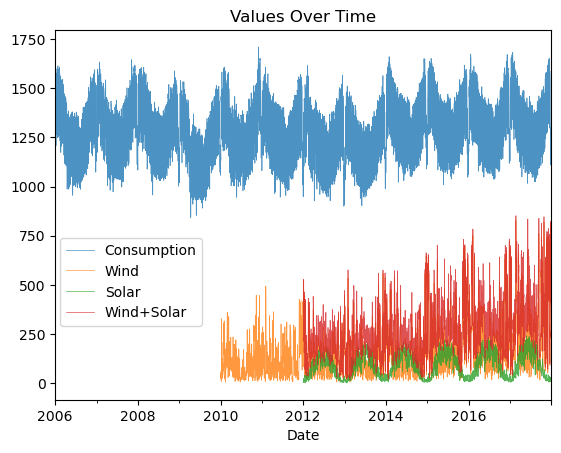

In [15]:
# Plot the values over time for each of the four columns (one plot for all columns)
data.plot(linewidth=0.5, alpha = 0.8)
plt.title('Values Over Time')
plt.legend(loc = [0.01,0.2]);

2.4 (10 points) For each of the four columns, resample the mean values per week (you can include missing values) and vizualize the results on a same plot. Do the same for the mean values per month.

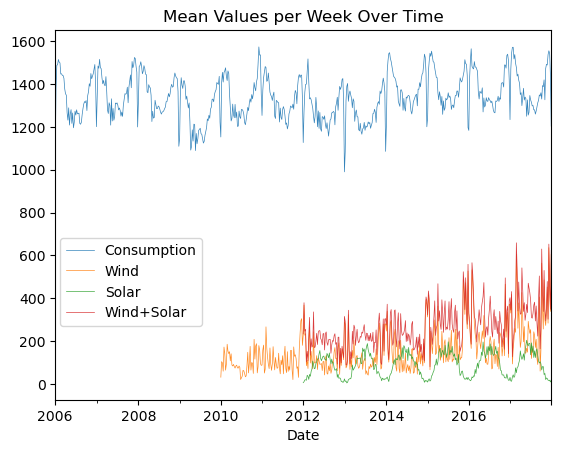

In [16]:
# resample the mean values per week
data_w = data.resample('W').mean()
# vizualize the results on a same plot
data_w.plot(linewidth=0.5, alpha = 0.9)
plt.title('Mean Values per Week Over Time')
plt.legend(loc = [0.01,0.2]);

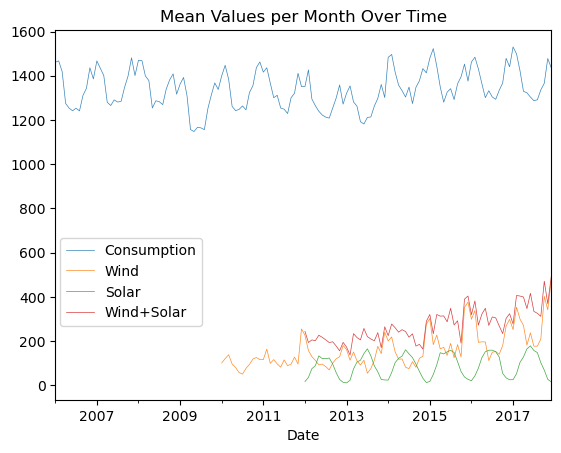

In [17]:
# resample the mean values per month
data_m = data.resample('M').mean()
# vizualize the results on a same plot
data_m.plot(linewidth=0.5, alpha = 0.9)
plt.title('Mean Values per Month Over Time')
plt.legend(loc = [0.01,0.2]);

2.5 (5 points) Group-by the values of the `Consumption` column per day of the week and plot the average consumption for each day of the week (you can include missing values). 

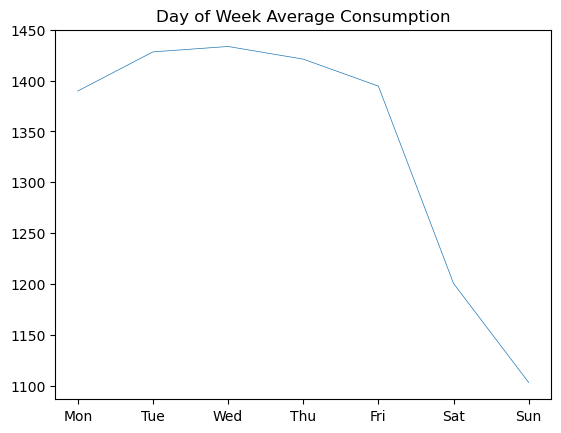

In [18]:
# Group-by the values of the Consumption column per day of the week,
# and calculate the average consumption for each day of the week
consumption_dow = data['Consumption'].groupby(data.index.dayofweek).mean()
consumption_dow.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot the average consumption for each day of the week
consumption_dow.plot(linewidth=0.5)
plt.title('Day of Week Average Consumption');

2.6 (5 points) Group-by the values of each column per month of the year and compute the average of each column per  month of the year (you can include missing values). Call this data frame `monthlydata`. Then, vizualize these averages for each column per month of the year on a same plot.

In [19]:
# Group-by the values of the Consumption column per month of the year,
# and calculate the average consumption for each month of the year
monthlydata = data.groupby(data.index.month).mean()
monthlydata.index = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
monthlydata

,Consumption,Wind,Solar,Wind+Solar
January,1433.781435,207.716480,19.569602,260.175301
February,1452.463841,206.942903,43.846735,271.954265
March,1380.694497,174.218785,88.038121,283.819039
April,1298.457644,148.644725,119.734933,282.360956
May,1261.905065,129.161601,139.967312,282.497296
June,1263.169508,114.812058,152.569494,282.270861
July,1266.701788,112.376440,150.746720,272.875124
August,1249.991327,109.350778,138.778575,256.876242
September,1314.348716,127.731125,103.247256,241.696133
October,1351.406597,172.314177,61.328371,249.788495


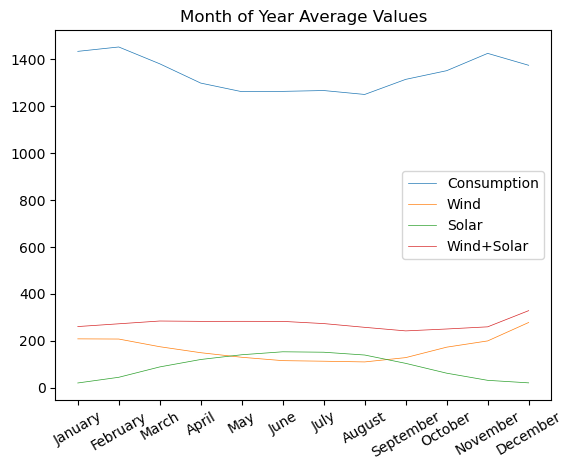

In [20]:
# plot the average consumption for each month of the year
monthlydata.plot(linewidth=0.5)
plt.xticks(ticks = np.arange(0,12), labels = monthlydata.index, rotation = 30)
plt.title('Month of Year Average Values');

2.7 (10 points) Write a function which takes a series as input, and returns a tuple of four values: the minimum of the values in the series, the index at which the minimum occurs, the maximum of the values in the series, and the index at which the maximum occurs.

Loop over each column of the data frame `monthlydata` computed in *2.6*, and at every iteration print the name of the column and apply the above function to print the 4 outputs for this column.


In [21]:
# write the fuunction that find minimum of the values in the series, the index at which the minimum occurs, 
# the maximum of the values in the series, and the index at which the maximum occurs
def min_and_max(s):
    # check if input is of valid type = pd Series
    assert isinstance(s, pd.Series), 'input needs to be a pandas Series'
    
    # 1st output - min
    s_min = s.min()
    # 2nd output - min index
    s_min_i = s.idxmin()
    # 3rd ouput - max
    s_max = s.max()
    #4th output - 
    s_max_i = s.idxmax()
    
    return (s_min, s_min_i, s_max, s_max_i)

In [22]:
# Loop over each column of the data frame monthlydata
for col, val in monthlydata.iteritems():
    # print the name of the column
    print(col)
    # apply the above function to print the 4 outputs for this column
    print(min_and_max(val))

Consumption
(1249.991327096774, 'August', 1452.4638407079644, 'February')
Wind
(109.35077822580645, 'August', 277.5665263157895, 'December')
Solar
(19.569602150537634, 'January', 152.56949444444444, 'June')
Wind+Solar
(241.69613333333336, 'September', 328.06539247311827, 'December')


2.8 (5 points) For which month is the average consumption the lowest, and for which one is it the highest?

In [23]:
# find which month is the average consumption the lowest/highest
min_val, min_month, max_val, max_month = min_and_max(monthlydata['Consumption'])

print(f'{min_month} has the lowest average consumption')
print(f'{max_month} has the highest average consumption')

August has the lowest average consumption
February has the highest average consumption
